In [4]:
import pandas as pd
ad=pd.read_csv('D:/Internship/Click Through Rate Machine Learning Model/DataSets/ad (1).csv')
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [2]:
ad.nunique().sort_values(ascending=False)

Timestamp                   567
Ad Topic Line               559
Area Income                 524
City                        521
Daily Internet Usage        505
Daily Time Spent on Site    460
Country                     207
Age                          39
Gender                        2
Clicked on Ad                 2
dtype: int64

In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [4]:
ad.Timestamp=pd.to_datetime(ad.Timestamp)
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  float64       
 2   Area Income               10000 non-null  float64       
 3   Daily Internet Usage      10000 non-null  float64       
 4   Ad Topic Line             10000 non-null  object        
 5   City                      10000 non-null  object        
 6   Gender                    10000 non-null  object        
 7   Country                   10000 non-null  object        
 8   Timestamp                 10000 non-null  datetime64[ns]
 9   Clicked on Ad             10000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 781.4+ KB


In [5]:
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
import numpy as np

numeric_cols = ad.select_dtypes(include=[np.number])


skewness_sorted = numeric_cols.skew().sort_values(ascending=False)

print(skewness_sorted)


Age                         0.356275
Daily Time Spent on Site    0.070013
Clicked on Ad               0.033210
Daily Internet Usage        0.000749
Area Income                -0.494070
dtype: float64


In [7]:
for i in ['Clicked on Ad', 'Country', 'City',
          'Gender']:
    print(i)
    print(round(ad[i].value_counts()*100/len(ad),2),'\n')

Clicked on Ad
0    50.83
1    49.17
Name: Clicked on Ad, dtype: float64 

Country
Australia                                       3.88
Czech Republic                                  3.30
Turkey                                          3.12
Qatar                                           2.24
Hong Kong                                       2.21
                                                ... 
South Georgia and the South Sandwich Islands    0.01
Wallis and Futuna                               0.01
Sierra Leone                                    0.01
Niue                                            0.01
Paraguay                                        0.01
Name: Country, Length: 207, dtype: float64 

City
Hubbardmouth       3.36
West Brandonton    2.75
Lisafort           2.61
Wintersfort        2.30
Stewartbury        2.07
                   ... 
Turnerview         0.01
North Tiffany      0.01
North Kristine     0.01
East Troyhaven     0.01
Davidview          0.01
Name: City, Length: 5

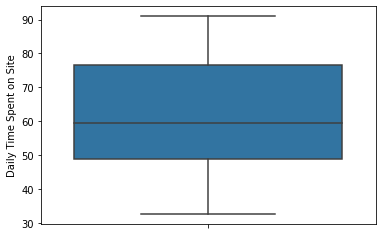

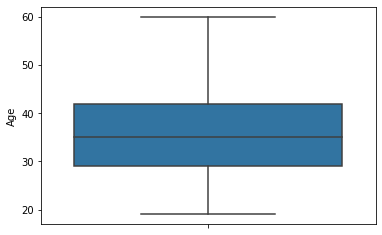

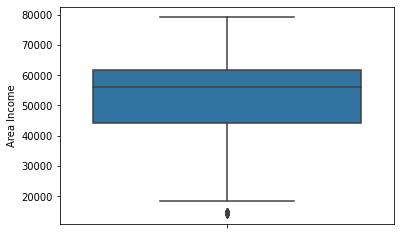

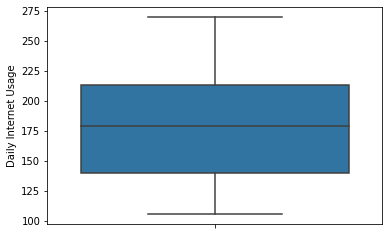

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']:
    plt.figsize=(10,5)
    sns.boxplot(y=ad[i])
    plt.show()

In [9]:
%pip install pycaret-nightly

     |████████████████████████████████| 288 kB 625 kB/s eta 0:00:01
     |████████████████████████████████| 167 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 436 kB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 36.3 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 34.9 MB/s eta 0:00:01     |████████████████████████▋       | 19.9 MB 34.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 34.3 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 38.9 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 37.2 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=24129367f21a

In [10]:
from pycaret.classification import * # type: ignore

In [11]:
from matplotlib.testing import setup


ad_click = setup(data = ad, target = 'Clicked on Ad', session_id=42,
                  normalize = True, 
                  transformation = True, 
                  log_experiment = True,
                date_features=['Timestamp'],
                  handle_unknown_categorical = True, 
                  unknown_categorical_method = 'most_frequent',
                  remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
                  ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                  combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
                    normalize_method='robust',    
                numeric_features=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'],
                  high_cardinality_features=['Country', 'City','Ad Topic Line'],
                categorical_features=['Gender'],
            train_size = 0.8
                )

,Description,Value
0,session_id,42
1,Target,Clicked on Ad
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 10)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,True


In [12]:
compare_models(sort = 'AUC') # type: ignore

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8690,0.9408,0.8675,0.8665,0.8668,0.7379,0.7383,23.3160
lightgbm,Light Gradient Boosting Machine,0.8701,0.9401,0.8667,0.8690,0.8677,0.7402,0.7404,0.2070
catboost,CatBoost Classifier,0.8684,0.9391,0.8560,0.8738,0.8647,0.7366,0.7370,3.6480
rf,Random Forest Classifier,0.8546,0.9309,0.8420,0.8595,0.8506,0.7091,0.7094,0.6700
et,Extra Trees Classifier,0.8616,0.9298,0.8570,0.8608,0.8588,0.7231,0.7233,0.5810
gbc,Gradient Boosting Classifier,0.8209,0.9031,0.7843,0.8406,0.8114,0.6412,0.6428,0.6510
knn,K Neighbors Classifier,0.7981,0.8736,0.7710,0.8091,0.7895,0.5958,0.5966,0.4510
ada,Ada Boost Classifier,0.7847,0.8606,0.7362,0.8088,0.7706,0.5687,0.5711,0.2110
lr,Logistic Regression,0.7502,0.8131,0.7255,0.7567,0.7406,0.5000,0.5007,0.4530
lda,Linear Discriminant Analysis,0.7511,0.8127,0.7245,0.7587,0.7410,0.5017,0.5025,0.0530


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)